# Machine Learning #1

## Makine öğrenmesi(Makine Öğrenimi) nedir? 
Basitçe, bilgisayarlara veriden çıkarım yaparak karar alma yeteneği kazandırmak olarak tanımlayabiliriz. Bunu yaparken, veriyi uygun yollarla biçimlendirip öğrenme işlemini yapacak olan modele input(girdi) olarak vereceğiz. Bu şekilde, birtakım karmaşık problemleri, eğer elimizde yeteri kadar veri varsa öğrenme kısmını adım adım kodlamamıza gerek olmadan çözebiliriz.

Örneğin: 
- Bir mailin spam olup olmadığını anlama
- Vikipedi içeriklerini konularına göre kategorileme

Birer makine öğrenimi problemi örneğidir. Makine öğrenimi temelde üçe ayrılır

**(Supervised Learning) Gözetimli(denetimli) öğrenme**: Etiketlenmiş veriden çıkarım yapmayı öğrenir

**(Unsupervised Learning) Gözetimsiz(denetimsiz) öğrenme**: Etiketlenmemiş veriden çıkarım yapmayı öğrenir

**(Reinforcement Learning) Takviyeli(pekiştirmeli) öğrenme**: Davranışçılıktan esinlenen, öznelerin bir ortamda en yüksek ödül miktarına ulaşabilmesi için hangi eylemleri yapması gerektiğiyle ilgilenen bir makine öğrenmesi yaklaşımıdır. Her hareketin sonunda bir ödül veya ceza verilerek bir deneğin belli bir harekete ya da hareket dizisine koşullanabileceği fikrinden ortaya çıkar.


Bu yazımızın konusu olan gözetimli öğrenme ile devam edelim.

## Gözetimli Öğrenme

Girdi olarak verilen birtakım özelliklerden çıkarım yaparak verilmeyen hedef bir özelliği tahmin etme mantığına dayanır. **Sınıflandırma** ve **regresyon** olarak iki alt türü vardır.

Sınıflandırma: Hedef değişken kategorilerden oluşur.

Regresyon: Hedef değişken, kategorize edilemeyen sürekli bir veri tipindedir. Örneğin ev fiyatı tahmin eden bir regresyon modeli geliştirdiğinizde, hedef değişken olan ev fiyatı girdi olarak verdiğiniz özelliklere göre dinamik olarak değişir, kategorilendirilemez.

Buraya kadarki terimleri farklı kaynaklarda farklı isimlerle görebilmeniz mümkündür. Kısaca bilgi verecek olursak,

Özellikler = tahmin değişkenleri = bağımsız değişkenler

Hedef değişken = bağımlı değişken = yanıt değişkeni


![title](ml01/1.jpg)

Bu tablo, makine öğrenimi alanında başlangıçta sıkça kullanılan Iris veri kümesine aittir. Burada dört adet tahmin değişkeni ve modelin bu değişkenleri öğrenerek tahmin ettiği bir adet hedef değişken görmektesiniz. Veri kümesindeki çiçeklerin taç yaprak ve çanak yapraklarına ait uzunluk ve genişlik verilerine göre fotoğrafın hangi çiçeğe ait olduğunu sınıflandıran bir model geliştirebilirsiniz. Bu veri kümesi, bizim de kullanacağımız oldukça verimli bir Python kütüphanesi olan scikit-learn kütüphanesinde yerleşik olarak bulunmaktadır. Çağırmak için,

In [117]:
from sklearn import datasets
iris = datasets.load_iris()

demeniz yeterlidir. Ara bir not olarak, bu kütüphanenin dokümantasyonunu oldukça iyi buluyorum. Yerleşik olarak bulunan diğer veri kümelerini incelemek isterseniz https://scikit-learn.org/stable/datasets/index.html adresinden inceleyebilirsiniz.

Bu yazıda yerleşik veri kümelerini kullanmayacağız, veri ön işlemesine**(preprocessing)** dair birkaç konuya değinmek için, harici bir kaynaktan aldığımız ancak yine kısmen hazır verilen başka bir veri kümesiyle yolumuza devam edeceğiz.

Veriyi temizlemek, işlemek ve görselleştirmek için gerekli kütüphanelerimizi dahil ederek başlayalım.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Numpy**: NumPy (Numerical Python) bilimsel hesaplamaları hızlı bir şekilde yapmamızı sağlayan bir matematik kütüphanesidir.

**Pandas**: Veri analitiği alanında, özellikle veri işleme ve analizi için sıklıkla kullanılan bir Python paketidir. Veriyi Excel'e benzer bir tablo yapısında işlemenize olanak tanır ve CSV, Excel vb. pek çok farklı formattaki veriyi işlemeniz mümkün olabilir.

**Matplotlib**: Veri görselleştirme için kullanacağımız temel Python kütüphanesidir.

**Seaborn**: Matplotlib tabanlı istatistiksel bir veri görselleştirme kütüphanesidir, veri görselleştirmenin faydalarını sıradaki başlıkta göreceğiz.

Buradaki kütüphanelerle neler yapılabileceğine de farklı bir yazı dizisinde daha detaylı değineceğiz. Şimdi veri kümemizi çalışma ortamına dahil edelim.

In [126]:
df = pd.read_csv('house-votes-84.data')

Veri kümesini https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records adresinden aldım. Bu küme, 1984 yılındaki bir Birleşik Devletler Kongre oturumundaki oylama kayıtlarını içerir. Parti üyelerinin, hangi başlıkta 'evet' veya 'hayır' oyu verdiklerine göre hangi partiye ait olduklarını tahminlemeye çalışacağız 'Democrat'(Demokrat) veya 'Republican'(Cumhuriyetçi).

Buradaki aynı isimli veri setinde az sonra göreceğimiz başlıklar yok, ancak tanımlarda her bir sütunun tanımından bahsedilmiş, bir metin düzenleyicide ilk satıra bu tanımları ekledim, dosyanın düzenlenmiş haline de aşağıda paylaştığım GitHub reposundan ulaşabilirsiniz.

**Pandas** kütüphanesini **pd** kısaltmasıyla dahil ettim. Bunu bu şekilde yapmak zorunda değilsiniz, hiçbir kısaltma kullanmayabileceğiniz gibi, farklı bir kısaltma ile de dahil edebilirsiniz ancak global kullanım şekillerine uymakta fayda var (Bu tip standartların yanı sıra kod yazarken dikkat etmeniz gereken bazı standartlar bile var. Örneğin değişken tanımlarken a=1 yerine a = 1 şeklinde, operatörün sağına ve soluna boşluk bırakmak gibi. Bunlara **PEP-8** standartları denir ve eğer bir **IDE** kullanıyorsanız **IDE**'niz size kodunuzu bu standartlara uygun yazmanız için yardımcı olur. Bununla ilgili de daha detaylı bir yazı kaleme alacağım. Konumuza devam edelim.)

## Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

Görsel veya nümerik yöntemlerle, veriyi bir özet üzerinden yorumlama yaklaşımıdır. Veriyi ön işleme noktasında atılması gereken adımlardan çıkarım yapmak için kullanılacak metod ve modele kadar pek çok konuda fikir sahibi olmamızı sağlar.

### Numerical EDA

Veriyi nümerik olarak özetleme yaklaşımıdır. Bunun için birkaç tane **pandas** metodu kullanacağız.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   party                                   435 non-null    object
 1   handicapped-infants                     435 non-null    object
 2   water-project-cost-sharing              435 non-null    object
 3   adoption-of-the-budget-resolution       435 non-null    object
 4   physician-fee-freeze                    435 non-null    object
 5   el-salvador-aid                         435 non-null    object
 6   religious-groups-in-schools             435 non-null    object
 7   anti-satellite-test-ban                 435 non-null    object
 8   aid-to-nicaraguan-contras               435 non-null    object
 9   mx-missile                              435 non-null    object
 10  immigration                             435 non-null    object
 11  synfue

***df.info()***, veriye dair genel bir bilgi edinmemizi sağlar. Burada özelliklerin isimlerini, kaç satır ve sütünluk bir veri kümemiz olduğunu görebiliriz. 435 satır ve 17 sütundan oluşan bir veri kümemiz var. Bu kümedeki 16 değişkeni tahminleyici olarak, 1 değişkeni(parti) ise hedef değişken olarak kullanacağız. 435x17 verinin tamamının non-null olduğunu görüyoruz ki bu önemli, çünkü numpy, pandas, scikit-learn gibi kütüphanelerin doğru çalışması için bütün verinin non-null ve aynı tipte olması gerekir.

In [128]:
df.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


***df.describe()*** ise, info ile aldığımız genel bilgiye dair başka bir özet sunar. Her bir değişkenden kaç adet olduğu veya bu değişkenlerin değerlerinin kaça ayrıldığı gibi. **Burada dikkatimizi çeken bir nokta, 'party' için beklediğimiz gibi 2 adet (Democrat, Republican) tekil(unique) değer varken, diğer başlıklarda 3 değer var.**

*Bunun anlamı, özellik değerlerinin içerisinde tipi 'null' veya 'NaN' olmasa bile ön işlemeye muhtaç verilerin olduğudur. Verileri daha yakından bakalım*

In [129]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


***df.head()*** komutu ile, varsayılan olarak ilk 5 satırdaki verileri görebiliyoruz. Eğer bu verilerde aradığımız cevabı bulamayıp daha fazla veriye ihtiyaç duyarsak komutun içerisinde istediğimiz sayıyı yazarak daha fazla miktarda veriyi görebiliriz. Örneğin; 

In [130]:
df.head(10)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


Diyerek ilk 10 satırı görmüş olduk. Dikkatimizi çekmesi gereken nokta, bazı değerlerin '?' şeklinde verildiğidir. Bir sonraki adımda bu analizi görsel olarak da yaptıktan sonra bu konuya eğileceğiz.

### Visual EDA

Bir önceki adımda nümerik olarak gördüğümüz veri kümemize bu adımda da görsel olarak bakalım. Örneğin 'immigration' konusunda kullanılan oyların dağılımına bakalım.  

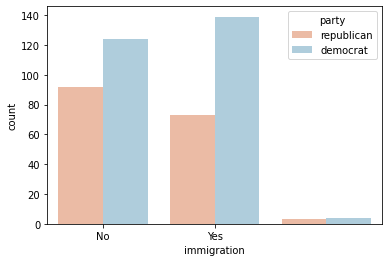

In [131]:
plt.figure()
sns.countplot(x='immigration', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Bir önceki adımda elde ettiğimiz bilgiyi doğrular bir şekilde, 'evet' veya 'hayır' dışında üçüncü bir oy şekli daha görüyoruz. Bu da çözmemiz gereken '?' şeklindeki verilerdir. Bu problemi çözebilmek için scikit-learn kütüphanesinin ***SimpleImputer*** metodundan yararlanacağız.

In [132]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='?', strategy='most_frequent')

***SimpleImputer*** objesinden ***imputer*** ismini verdiğimiz bir değişken yarattık. missing_values parametresine, kayıp değer olarak kabul ettiğimiz ve değiştirmek istediğimiz '?' string değerini verdik. Bu parametrenin varsayılanı "NaN"'dır(Not a Number). strategy parametresini de ***'most_frequent'*** olarak belirledik. Böylelikle, '?' ile belirtilmiş değerler o sütunda hangi değer en çoksa ona eşitlenecek(yani sıklığına göre eğer 'hayır' oyları en fazlaysa 'n' veya 'evet' oyları en fazlaysa 'y').

**Not:** Kendi araştırmalarınızda, internette bazı kaynaklarda bu işlem için *from sklearn.preprocessing import Imputer* şeklinde bir çağırma yapıldığını görebilirsiniz. Ancak bu metod yeni versiyonda kaldırılmış ve yerini bizim kullandığımız sklearn.impute.SimpleImputer metoduna bırakmıştır.

![title](2.jpg)

***missing_values*** ve ***strategy*** parametrelerinin hangi değerleri alabildiğini ve bu değerlerin ne anlama geldiğini burada görebilirsiniz. Metodun diğer parametreleri için; https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html adresinden orjinal dokümantasyonu okuyup örnekleri inceleyebilirsiniz.

Sırada modelimizi belirlemek ve eğitmek var. Bu bir sınıflandırma problemi olduğu için k-NN(k-Nearest Neighbours /k-En Yakın Komşuluk) algoritmasını bu problemin çözümü için kullanabiliriz. Bu algoritmanın çalışma prensiplerine değinecek olursak;

**En yakın k noktanın sınıflarına bakar,**

**Bu k adet noktanın çoğunluğu hangi sınıfa aitse, incelediği noktanın sınıfını da o sınıf olarak belirler.** 

Görseller üzerinden gidecek olursak,

![title](3.jpg)

Elimizde kırmızı ve yeşil noktalardan oluşan bir veri kümesi olduğunu düşünelim. Ve hangi sınıfa ait olduğunu henüz bilmediğimiz de bir noktamız var. k parametremizin değerini 3 olarak belirlersek

![title](4.jpg)

Algoritmamız bu en yakın 3 noktaya bakar, çoğunluğun kırmızı olduğunu görür ve rengi atanmamış noktaya da kırmızı rengi değer olarak atar. Eğer k değerimizi 5 olarak seçersek

![title](5.jpg)

Bu kez çoğunluk yeşil renkte olduğu için algoritmamız aradığımız sınıfın yeşil olduğuna karar verecektir.

![title](6.jpg)

kNN algoritması eğitim kümesini inceler, tahmin yapmak için ,tüm veri kümesindeki en yakın komşuları arar. Şimdi algoritmamızı çalışma ortamımıza dahil edelim.

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)

Yine ***scikit-learn*** kütüphanesi kullanarak kNN algoritmamızı çağırdık ve karar verirken kullanacağı komşuluk değerini gösteren ***n_neighbors*** parametresini 2 olarak belirleyerek knn_model adını verdiğimiz değişkeni tanımladık. Şimdi sıra geldi adımlarımızı oluşturmaya.

In [109]:
steps = [('imputation', imputer),
('knn', knn_model)]

Bu şekilde, adımlarımızı Python tuple'larından oluşan bir liste şeklinde kümelemiş olduk. Tanımlamış olduğumuz ***steps*** değişkenini tahminleme sürecini adım adım kodlamak yerine bir ***pipeline*** oluşturmak için kullanacağız.

In [134]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

***sklearn.pipeline*** metodunu kullanarak algoritmanızı, parametrelerinizi, veri önişleme adımlarınızı tek bir değişken (bizim ***steps*** adını verdiğimiz) içerisinde gruplayarak daha derli toplu kod yazabilirsiniz.

Gelelim elimizdeki veri kümesinden eğitim ve test kümeleri oluşturmaya. Bunun için ***train_test_split*** metodunu kullanacağız. Ayrıca 'party' özelliğini hedef, diğer özellikleri ise tahminleyici olarak belirleyeceğiz.

In [139]:
from sklearn.model_selection import train_test_split
y = df['party'].values
X = df.drop('party', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df[df == 'n'] = 0
df[df == 'y'] = 1

Veri kümemizdeki her bir verinin 'party' değerlerini ***y*** değişkenine atadık. Ardından veri kümemizden bu değerleri düşürerek geri kalan değerleri ***X*** değişkenine atadık. Böylelikle tahminleyici ve hedef değişkenlerimizi oluşturmuş olduk.

Ardından train_test_split metodunu kullanarak verimizi train ve test olarak ikiye ayırdık. Ayırırken, ***test_size*** parametresiyle test kümemizin büyüklüğünü tüm verinin %30'u olarak belirledik. Geri kalanı da eğitim(train) verisi olarak ayırmış olduk. 

***random_state*** için, basitçe veriyi bölmeden önce karıştırma(shuffle) için kullandığımız bir tam sayı parametresi. Daha fazla bilgi için yine dokümanı inceleyebilirsiniz, incelediğiniz eğitim, doküman vb. genellikle bu parametrenin 42'ye eşitlendiğini görürsünüz.

Son olarak bilmemiz gereken başka bir kritik nokta da, modelimizin/algoritmamızın ***string*** tipinde verileri işleyemeyeceğidir. kNN algortimasının görsel anlatımında da gördüğümüz gibi, tüm işleyiş vektör uzayındaki bir uzaklık hesabına(Öklid uzaklığı) dayanır. Veri kümemizdeki her bir noktayı matematiksel olarak modelleyebilmek için, 'n' ve 'y' olarak verilmiş değerleri 0 ve 1'e değiştiriyoruz. Biraz daha popüler Python kütüphanelerine ve uygulamalara değinmek istediğim için matematiksel anlatımlara bu yazı serisinde çok fazla yer vermeyeceğim. Sırada algoritmanın veriyi öğrenmesi ve çıkarım yapması var.

In [137]:
from sklearn.metrics import accuracy_score
knn_pipeline = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.9236641221374046

Verinin ön işlenmesi ve öğrenme aşamalarıyla bir ***pipeline*** oluşturmuştuk. Bu noktada ***pipeline*** kullanmadan çalışmak isterseniz ***knn_model.fit()*** metoduyla direkt modelin veriden çıkarım yapmasını da sağlayabilirsiniz. Bu durumda önceki aşamaları adım adım kodlamanız gerekeceğini unutmayın.

Ardından ***predict*** metoduna test için ayırdığımız girdi kümesini vererek ***tahminleme*** yapmasını sağlıyoruz. Son olarak yine ***scikit-learn*** kütüphanesinden dahil ettiğimiz ***accuracy_score*** metodunu kullanarak başarım oranımızın yaklaşık **%92.37** olduğunu görebiliriz. 

**Peki, bu oranı daha da yükseltebilmek için neler yapabiliriz? Başarımımızın olabileceğinden daha düşük olmasına ne sebep olmuş olabilir?**

Dikkat etmemiz gereken ilk nokta, ***n_neihgbors*** parametresinin **2** olarak seçilmiş olması. Bu parametrenin daha yüksek olması, belki de daha yüksek bir skor elde etmemizi sağlayabilirdi.

İkinci nokta ise, train/test olarak ayrılan veri. Biz, verinin %30'unu test verisi olarak ayırmıştık, ancak ayrılan verinin rastgele olarak seçildiğini unutmayın. Belki de, farklı %30'u test verisi olarak belirlemiş olsaydık, yani daha farklı bir %70 ile algoritmamızı eğitseydik sonuç daha farklı olacaktı. **Bu iki problemi nasıl çözebiliriz?**

![title](7.jpg)

İlk tekniğimiz **cross-validation(çapraz doğrulama)**. Bu teknik, her bir adımda farklı bir train/test ayrımının yapılmasını ve en iyi öğrenmenin seçilmesine dayanır. Örnek olarak, train/test verisinin 80/20 oranında ayrıldığı bir gösterimi temel aldım. her ayrımda(split) train/test kümelerini farklı farklı seçerek bir ölçüm(metric) alıyoruz. Bu ayrımlardan hangisi en yüksek skorlu ise, ayrımımızı o olarak seçiyoruz.

Bu tekniğimizi birleştireceğimiz asıl teknik ise **grid search cross-validation**. Veri kümemizi **grid**lere ayırarak her bir adımda sadece train/test kümesini farklı ayırmakla kalmıyor, aynı zamanda farklı bir ***n_neighbor*** parametresiyle deniyoruz. Bu tekniğin Python implementasyonunu ***sklearn.model_selection.GridSearchCV*** ile yapacağız.

In [140]:
from sklearn.model_selection import GridSearchCV
parameters = {'knn__n_neighbors': np.arange(1, 50)}
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5) 

**knn** algoritmasına ait ***n_neighbors*** parametresine, ***numpy*** kütüphanesinin yardımıyla **1**'den **50**'ye kadar değer vereceğiz. Farklı bir algoritmanın farklı bir parametresini kullanmak isterseniz **'modelname__parameter'** şeklinde yazmalısınız. ***GridSearchCV*** metoduna önce ***pipeline***'ımızı, daha sonra da ***param_grid*** parametresine değer olarak **Python sözlüğü(dictionary)** tipinde oluşturduğumuz ***parameters*** değişkenimizi atadık. ***cv*** parametresine train/test ayrımımızı kaç farklı şekilde yapmak istediğimizi de girerek, tekrar fit aşamasına geri dönüyoruz.

In [141]:
cv.fit(X_train, y_train)
print("Tuned KNN Parameters: {}".format(cv.best_params_)) 
print("Best score is {}".format(cv.best_score_))

Tuned KNN Parameters: {'knn__n_neighbors': 6}
Best score is 0.9375956284153005


Burada algoritmamız her bir ***n_neighbor*** değeri için veriyi 5 farklı şekilde işleyerek çalıştı, en iyi parametreyi ve skoru belirledi. ***cv.best_params_*** metoduyla en iyi ***n_neighbor*** değerinin **6** olduğunu, ***cv.best_score_*** ile de en iyi skorumuzun yaklaşık **%93.76** olduğunu gördük.

**Machine Learning** yazı dizisinin sonraki konularında farklı problemlere farklı **ML** yaklaşımlarını, başarımı ölçmek için kullanılabilecek farklı metodları inceleyeceğiz. Faydalı olması dileklerimle.

## Kaynaklar
https://archive.ics.uci.edu/ml/datasets/

https://scikit-learn.org/stable/index.html